<h1>Exploring for a potential coffee shop venue in Toronto¶
</h1>
--Shomi Ahmed

## Table of contents
1. [Introduction](#introduction)
  1. [Background](#background) 
  2. [Business Probelm](#bProb) 
2. [Methodology](#Method) 
3. [Data](#data)
4. [Analysis](#analysis)
5. [Results and Discussion](#results)
6. [Conclusion](#conclusion)

## 1. Introduction

#### A. Background
This notebook is about comparing different neighborhoods of Toronto to search for optimal location of coffee shop with low neighbourhood crime rate. Toronto is the capital of Ontario province and the most populous city in Canada. It is characterized as one of the most multicultural and cosmopolitan cities in the world. The visible minority group here is more than 50 percent.

Coffee shop business is one of the strengths of its highly diversified economy. The city of Toronto has 140 neighbourhoods.  The best neighbourhood with coffee shops being most common venue will be sorted from them.

#### B. Business Problem
The XYZ comapany is willing to open a new coffee shop in a comparatively populated neighbourhood of Toronto with lowest crime rate. The coffee shops should be popular in that neighbouhood. 


## 2. Methodology

The XYZ company has emphasized on the neighbourhood with lowest crime rate. So it is required to find out -

- **Which neighbourhoods have the lowest crime?**
- **Is population density correlated to the crime level?**

After sorting out the lowest crime rate neighbourhoods, the question to be answered is -
 
- **What venues are the most common in different locations within the neighbourhoods with lowest crime rate?**

We will have a clear piture of neighbourhoods with lowest crime rate but famous for coffee shop. Then the query to be answered is -

- **What is the densely pouplated neighbourhood fullfilling the above requirements?**

To find out the answer of the above questions, the City of Toronto will be segmented into different neighbourhoods using the geographical coordinates of the center of each neighborhood, and then using a combination of location data and machine learning, the neighborhoods will be grouped into clusters. It is required to leverage location  data to get deeper insights into a neighborhood's reputation. 

## 3. Data

To understand and explore we will need the following City of Toronto Open Data:


- Toronto Crime by Neighbourhood: https://opendata.arcgis.com/datasets/af500b5abb7240399853b35a2362d0c0_0.geojson
- Toronto Neighbourhoods Geo: https://open.toronto.ca/dataset/neighbourhoods/
- Foursquare Developers Access to venue data: https://foursquare.com/

The **'Toronto Crime by Neighbourhood'** data will be used to find out the neighbourhoods having lowest crime rate. It also contains the population info of each neighbourhoods. The combination of Foursquare APIs and the **'Toronto Neighbourhoods Geo'** data will then allow us to cluster and quantitatively understand the venues most common to that location.

## 4. Data Analysis

Lets import all the required libraries required for the above data analysis.

In [281]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

from geopy.distance import geodesic

%matplotlib inline
import matplotlib.pyplot as plt
#creates a figure with 10 (width) x 5 (height) inches
plt.rcParams['figure.figsize'] = [14, 7]
print('Libraries imported.')

Libraries imported.


Let's load the crime data found on [Toronto Crime by Neighbourhood](http://data.torontopolice.on.ca/datasets/neighbourhood-crime-rates-boundary-file-/data).

In [282]:
url='https://opendata.arcgis.com/datasets/af500b5abb7240399853b35a2362d0c0_0.geojson'
r=requests.get(url).json()

Let's take a quick look at the data.

In [283]:
#r

Notice how all the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [6]:
neighborhoods_crime_data = r['features']

Let's take a look at the first item in this list.

In [7]:
# neighborhoods_crime_data[0]

Tranform the data into a *pandas* dataframe

In [8]:
df_T_C=json_normalize(neighborhoods_crime_data)
df_T_C.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,type,properties.OBJECTID,properties.Neighbourhood,properties.Hood_ID,properties.Population,properties.Assault_2014,properties.Assault_2015,properties.Assault_2016,properties.Assault_2017,properties.Assault_2018,properties.Assault_2019,properties.Assault_AVG,properties.Assault_CHG,properties.Assault_Rate_2019,properties.AutoTheft_2014,properties.AutoTheft_2015,properties.AutoTheft_2016,properties.AutoTheft_2017,properties.AutoTheft_2018,properties.AutoTheft_2019,properties.AutoTheft_AVG,properties.AutoTheft_CHG,properties.AutoTheft_Rate_2019,properties.BreakandEnter_2014,properties.BreakandEnter_2015,properties.BreakandEnter_2016,properties.BreakandEnter_2017,properties.BreakandEnter_2018,properties.BreakandEnter_2019,properties.BreakandEnter_AVG,properties.BreakandEnter_CHG,properties.BreakandEnter_Rate_2019,properties.Homicide_2014,properties.Homicide_2015,properties.Homicide_2016,properties.Homicide_2017,properties.Homicide_2018,properties.Homicide_2019,properties.Homicide_AVG,properties.Homicide_CHG,properties.Homicide_Rate_2019,properties.Robbery_2014,properties.Robbery_2015,properties.Robbery_2016,properties.Robbery_2017,properties.Robbery_2018,properties.Robbery_2019,properties.Robbery_AVG,properties.Robbery_CHG,properties.Robbery_Rate_2019,properties.TheftOver_2014,properties.TheftOver_2015,properties.TheftOver_2016,properties.TheftOver_2017,properties.TheftOver_2018,properties.TheftOver_2019,properties.TheftOver_AVG,properties.TheftOver_CHG,properties.TheftOver_Rate_2019,properties.Shape__Area,properties.Shape__Length,geometry.type,geometry.coordinates
0,Feature,1,Yonge-St.Clair,097,12528,20,29,39,27,34,37,31.0,0.09,295.3,2,3,7,2,6,6,4.3,0.00,47.9,37,20,12,19,24,28,23.3,0.17,223.5,0,0,0,0,0,0,0.0,0.0,0.0,6,5,6,8,5,4,5.7,-0.20,31.9,4,5,8,0,3,6,4.3,1.00,47.9,1.161315e+06,5873.270582,Polygon,"[[[-79.3911544450554, 43.6810810205658], [-79...."
1,Feature,2,York University Heights,027,27593,271,296,361,344,357,370,333.2,0.04,1340.9,105,100,105,92,92,144,106.3,0.57,521.9,107,139,98,105,122,108,113.2,-0.11,391.4,1,0,2,1,1,0,0.8,-1.0,0.0,59,84,70,75,88,79,75.8,-0.10,286.3,30,46,37,39,38,28,36.3,-0.26,101.5,1.324666e+07,18504.777326,Polygon,"[[[-79.5052468371003, 43.7598739861204], [-79...."
2,Feature,3,Lansing-Westgate,038,16164,44,80,68,85,75,72,70.7,-0.04,445.4,19,22,27,26,16,32,23.7,1.00,198.0,34,27,41,42,50,39,38.8,-0.22,241.3,0,0,0,0,10,0,1.7,-1.0,0.0,11,5,9,17,35,11,14.7,-0.69,68.1,4,5,5,11,6,11,7.0,0.83,68.1,5.346186e+06,11112.109625,Polygon,"[[[-79.4399431314811, 43.7615578229059], [-79...."
3,Feature,4,Yorkdale-Glen Park,031,14804,106,136,174,161,175,209,160.2,0.19,1411.8,63,53,41,52,63,61,55.5,-0.03,412.1,51,57,66,58,64,84,63.3,0.31,567.4,1,1,1,1,2,1,1.2,-0.5,6.8,23,21,24,35,44,42,31.5,-0.05,283.7,23,14,26,23,20,29,22.5,0.45,195.9,6.038326e+06,10079.426920,Polygon,"[[[-79.4396472248458, 43.7056099782244], [-79...."
4,Feature,5,Stonegate-Queensway,016,25051,88,71,76,95,87,82,83.2,-0.06,327.3,34,29,12,32,31,34,28.7,0.10,135.7,71,45,49,49,39,64,52.8,0.64,255.5,0,0,0,0,0,0,0.0,0.0,0.0,21,14,16,26,25,22,20.7,-0.12,87.8,7,8,4,6,7,4,6.0,-0.43,16.0,7.946202e+06,11853.189878,Polygon,"[[[-79.49258326535, 43.6474374941382], [-79.49..."


Let's take and rename the neccessay columns

In [9]:
df_T_crimeP=df_T_C[['properties.Neighbourhood','properties.Population','properties.Assault_AVG','properties.AutoTheft_AVG','properties.BreakandEnter_AVG','properties.Homicide_AVG','properties.Robbery_AVG','properties.TheftOver_AVG']]
df_T_crimeP.columns=['Neighbourhood', 'Population', 'Assault_AVG', 'AutoTheft_AVG', 'BreakandEnter_AVG', 'Homicide_AVG', 'Robbery_AVG','TheftOver_AVG']
df_T_crime=df_T_C[['properties.Neighbourhood','properties.Assault_AVG','properties.AutoTheft_AVG','properties.BreakandEnter_AVG','properties.Homicide_AVG','properties.Robbery_AVG','properties.TheftOver_AVG']]
df_T_crime.columns=['Neighbourhood', 'Assault_AVG', 'AutoTheft_AVG', 'BreakandEnter_AVG', 'Homicide_AVG', 'Robbery_AVG','TheftOver_AVG']

df_T_crimeP.head()

,Neighbourhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG
0,Yonge-St.Clair,12528,31.0,4.3,23.3,0.0,5.7,4.3
1,York University Heights,27593,333.2,106.3,113.2,0.8,75.8,36.3
2,Lansing-Westgate,16164,70.7,23.7,38.8,1.7,14.7,7.0
3,Yorkdale-Glen Park,14804,160.2,55.5,63.3,1.2,31.5,22.5
4,Stonegate-Queensway,25051,83.2,28.7,52.8,0.0,20.7,6.0


Let's count the no. of neighbourhoods

In [236]:
print('The dataframe has {} neighbourhoods.'.format(df_T_crimeP.shape[0]))

The dataframe has 140 neighbourhoods.


##### What is the total crime in a neighbourhood?

In [12]:
#Finding the total crime by summing all the crime data in a row.
df_T_crimeP['Total Crime']=df_T_crimeP.loc[:,'Assault_AVG':'TheftOver_AVG'].sum(axis = 1)
df_T_crimeP.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighbourhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Total Crime
0,Yonge-St.Clair,12528,31.0,4.3,23.3,0.0,5.7,4.3,68.6
1,York University Heights,27593,333.2,106.3,113.2,0.8,75.8,36.3,665.6
2,Lansing-Westgate,16164,70.7,23.7,38.8,1.7,14.7,7.0,156.6
3,Yorkdale-Glen Park,14804,160.2,55.5,63.3,1.2,31.5,22.5,334.2
4,Stonegate-Queensway,25051,83.2,28.7,52.8,0.0,20.7,6.0,191.4


##### To find the crime rate independent of nieghbourhood's population, let's find the total crime per 100 population in each neighbourhood. It can be easily found out by dividing the total crome by respective neighbourhood's population and then multiply by 100.

In [13]:
df_T_crimeP['Total Crime/100']=round(df_T_crimeP['Total Crime']/df_T_crimeP['Population']*100,2)
df_T_crimeP.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Neighbourhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Total Crime,Total Crime/100
0,Yonge-St.Clair,12528,31.0,4.3,23.3,0.0,5.7,4.3,68.6,0.55
1,York University Heights,27593,333.2,106.3,113.2,0.8,75.8,36.3,665.6,2.41
2,Lansing-Westgate,16164,70.7,23.7,38.8,1.7,14.7,7.0,156.6,0.97
3,Yorkdale-Glen Park,14804,160.2,55.5,63.3,1.2,31.5,22.5,334.2,2.26
4,Stonegate-Queensway,25051,83.2,28.7,52.8,0.0,20.7,6.0,191.4,0.76


Let's visualize the no. of neighbourhoods by total crime rate per 100 population in 10 sperate ranges of crime rate.

Text(0, 0.5, 'No of Neighbourhoods')

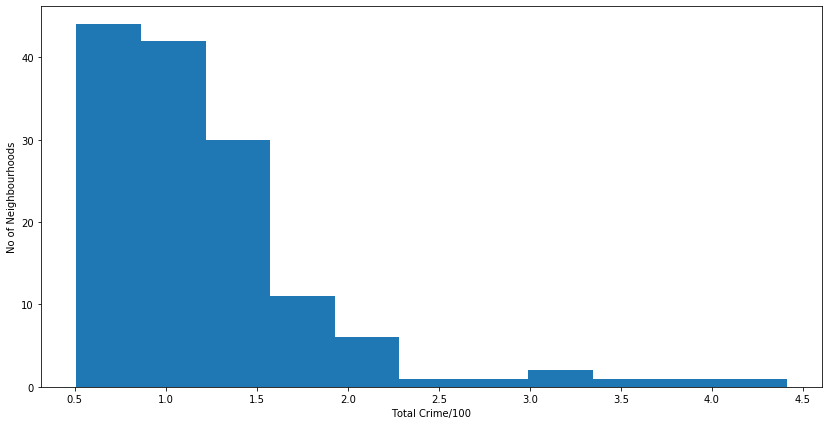

In [14]:
plt.hist(df_T_crimeP['Total Crime/100'],bins=11)

# set x/y labels and plot title
plt.xlabel("Total Crime/100")
plt.ylabel("No of Neighbourhoods")
# plt.title("Total Crime/100 bins")

##### So there are around 45 neigbourhoods having total crime rate per 100 population within range 0.5~0.9.

Now let's find the no. of neighbourhoods as **count** in each min thresholds of total crime per 100 population which termed as **divison**.

In [15]:
count, divison = np.histogram(df_T_crimeP['Total Crime/100'],bins=11)
print (count,np.round(divison,2))

[44 42 30 11  6  1  1  2  1  1  1] [0.51 0.86 1.22 1.57 1.93 2.28 2.64 2.99 3.35 3.7  4.06 4.41]


Let's convet the lower thresholds in range of thresholds.

In [16]:
d=[]
for i in range (0,len(divison)-1):
        d.append('('+str(round(divison[i],2))+'-'+str(round(divison[i+1],2))+')')
print(d,count)

['(0.51-0.86)', '(0.86-1.22)', '(1.22-1.57)', '(1.57-1.93)', '(1.93-2.28)', '(2.28-2.64)', '(2.64-2.99)', '(2.99-3.35)', '(3.35-3.7)', '(3.7-4.06)', '(4.06-4.41)'] [44 42 30 11  6  1  1  2  1  1  1]


Let's tranform the range and no. of neighbourhoods in dataframe.

In [17]:
dd=pd.DataFrame(d,count).reset_index()
dd.columns=['no of neighborhoods','crime range/100']
c=['Lowest','Semi Lowest','Semi Lower', 'Lower','Lower Medium','Medium','Upper Medium','Semi Higher','Higher','Semi Highest','Highest']
dd['crime status']=c
dd

,no of neighborhoods,crime range/100,crime status
0,44,(0.51-0.86),Lowest
1,42,(0.86-1.22),Semi Lowest
2,30,(1.22-1.57),Semi Lower
3,11,(1.57-1.93),Lower
4,6,(1.93-2.28),Lower Medium
5,1,(2.28-2.64),Medium
6,1,(2.64-2.99),Upper Medium
7,2,(2.99-3.35),Semi Higher
8,1,(3.35-3.7),Higher
9,1,(3.7-4.06),Semi Highest


##### So there are exacly 44 neighbourhoods with crime rate per 100 population in the range of 0.51-0.86. Lets plot the distribution of each range.

Text(0, 0.5, 'No of Neighbourhoods')

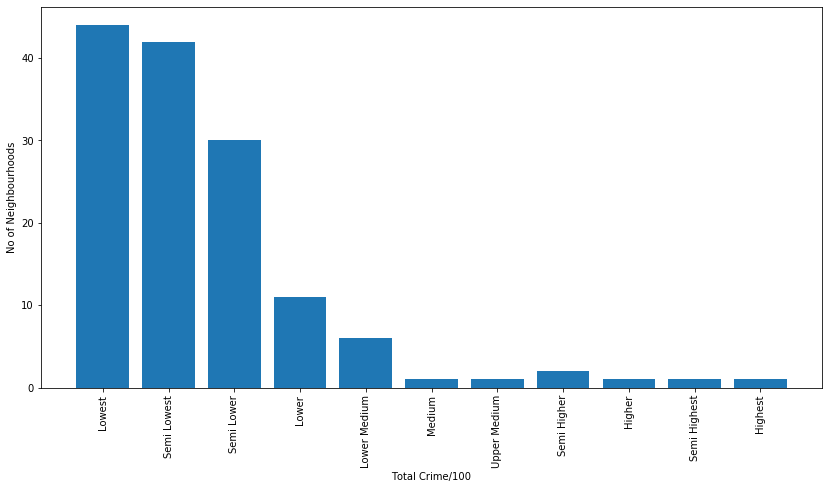

In [18]:
plt.bar(c, dd['no of neighborhoods'])
plt.xticks(dd.index,rotation=90)
# set x/y labels and plot title
plt.xlabel("Total Crime/100")
plt.ylabel("No of Neighbourhoods")

Let's insert the **Crime Status** column in our main crime dataframe based on crime rate.

In [19]:
f=[]
for i in range (0, len(df_T_crimeP['Total Crime/100'])):
    for j in range (0,len(divison)-1):
        if (df_T_crimeP['Total Crime/100'][i]>= divison[j] and df_T_crimeP['Total Crime/100'][i]<= divison[j+1]):
#             df_T_crimeP['Comment'][i]=c[j]
            f.append(c[j])
df_T_crimeP['Crime Status']=f
df_T_crimeP.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Neighbourhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Total Crime,Total Crime/100,Crime Status
0,Yonge-St.Clair,12528,31.0,4.3,23.3,0.0,5.7,4.3,68.6,0.55,Lowest
1,York University Heights,27593,333.2,106.3,113.2,0.8,75.8,36.3,665.6,2.41,Medium
2,Lansing-Westgate,16164,70.7,23.7,38.8,1.7,14.7,7.0,156.6,0.97,Semi Lowest
3,Yorkdale-Glen Park,14804,160.2,55.5,63.3,1.2,31.5,22.5,334.2,2.26,Lower Medium
4,Stonegate-Queensway,25051,83.2,28.7,52.8,0.0,20.7,6.0,191.4,0.76,Lowest


##### As previusly visualized, there are exactly 44 neigbourhoods having total crime rate per 100 population within range 0.51~0.86. We will use info below to sort our original dataframe of 140 neighbourhoods to 44 neighbourhoods.

In [20]:
df_T_crime_trim=df_T_crimeP[(df_T_crimeP['Total Crime/100'] >= 0.5) & (df_T_crimeP['Total Crime/100'] <= 0.86)].reset_index()
df_T_crime_trim['Total Crime/100'].min()
df_T_crime_trim.head()

,index,Neighbourhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Total Crime,Total Crime/100,Crime Status
0,0,Yonge-St.Clair,12528,31.0,4.3,23.3,0.0,5.7,4.3,68.6,0.55,Lowest
1,4,Stonegate-Queensway,25051,83.2,28.7,52.8,0.0,20.7,6.0,191.4,0.76,Lowest
2,5,Tam O'Shanter-Sullivan,27446,109.7,23.0,62.7,0.7,27.7,5.5,229.3,0.84,Lowest
3,6,The Beaches,21567,93.8,16.3,49.3,0.0,20.3,6.2,185.9,0.86,Lowest
4,8,Thorncliffe Park,21108,97.5,9.3,25.5,1.5,11.0,7.2,152.0,0.72,Lowest


Let's visualize the trimmed dataframe by scatter plot of total crime per 100 population vs population density.

Text(0, 0.5, 'No of population')

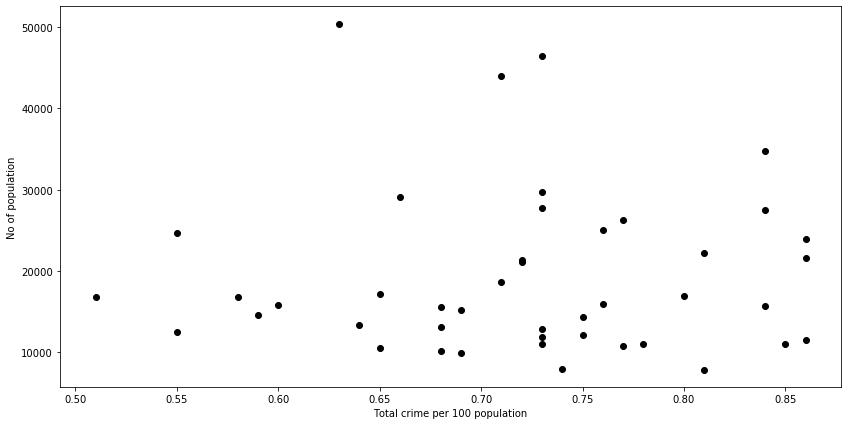

In [21]:
plt.plot(df_T_crime_trim['Total Crime/100'],df_T_crime_trim['Population'],'o', color='black')
plt.xlabel('Total crime per 100 population')
plt.ylabel('No of population')

##### We have successfully sorted out the 44 neighbourhoods having lowest crime rate and correleted the rate with population density. Now, let's load the neighbourhoods data with geometry found on [Toronto Neighbourhoods Geo](https://open.toronto.ca/dataset/neighbourhoods/).

In [22]:
df_geo=pd.read_csv('NeighbourhoodsT.csv')
print(df_geo.shape)
df_geo.head()

(140, 16)


,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,3501,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),NaN,NaN,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,3502,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),NaN,NaN,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
2,3503,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),NaN,NaN,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,3504,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),NaN,NaN,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
4,3505,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),NaN,NaN,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"{u'type': u'Polygon', u'coordinates': (((-79.4..."


Let's take and rename the necessary columns.

In [23]:
#taking the necessary column
df_geo=df_geo[['AREA_NAME','LATITUDE','LONGITUDE']]
#Renaming the column names
df_geo.columns=['Neighbourhood', 'Latitude', 'Longitude']
print(df_geo.shape)
df_geo.head()

(140, 3)


,Neighbourhood,Latitude,Longitude
0,Wychwood (94),43.676919,-79.425515
1,Yonge-Eglinton (100),43.704689,-79.403590
2,Yonge-St.Clair (97),43.687859,-79.397871
3,York University Heights (27),43.765736,-79.488883
4,Yorkdale-Glen Park (31),43.714672,-79.457108


In the neighbourhood column there are unnecessary data within parentheses which we do not need. To get rid, we have to use regular expression. **str.replace$($r$"\(.*\)","")$** deletes the parentheses and data within. Here-
- **r** used to represent regular expression
- **\** used to eascape special character. In this case **(** and **)**.
- **$.$** represent any data and **$*$** represent multiple repetitions.

And **str.strip$()$** removes any whitespace.

In [24]:
df_geo['Neighbourhood']=df_geo['Neighbourhood'].str.replace(r"\(.*\)","").str.strip()                                                                         
print(df_geo.shape)
df_geo.head()

(140, 3)


,Neighbourhood,Latitude,Longitude
0,Wychwood,43.676919,-79.425515
1,Yonge-Eglinton,43.704689,-79.403590
2,Yonge-St.Clair,43.687859,-79.397871
3,York University Heights,43.765736,-79.488883
4,Yorkdale-Glen Park,43.714672,-79.457108


Let's take the necessary columns from crime dataframe.

In [25]:
df_crime=df_T_crimeP[['Neighbourhood', 'Population', 'Total Crime/100','Crime Status']]
print(df_crime.shape)
df_crime.head()

(140, 4)


,Neighbourhood,Population,Total Crime/100,Crime Status
0,Yonge-St.Clair,12528,0.55,Lowest
1,York University Heights,27593,2.41,Medium
2,Lansing-Westgate,16164,0.97,Semi Lowest
3,Yorkdale-Glen Park,14804,2.26,Lower Medium
4,Stonegate-Queensway,25051,0.76,Lowest


##### Now there is a problem as Neighbourhood names are not in the same order in geo and crime dataframe although both has 140 neighbourhoods. Lets match the neighbourhood and then merge the dataframes.

In [26]:
lt=[]
lg=[]
n=[]
nT=[]
for i in range (0, len(df_crime)):
    for j in range (0,len(df_geo)):
        if (df_crime['Neighbourhood'][i]== df_geo['Neighbourhood'][j]):
            lt.append(df_geo['Latitude'][j])
            lg.append(df_geo['Longitude'][j])
            n.append(df_crime['Neighbourhood'][i])
            nT.append(df_geo['Neighbourhood'][j])
df_crime['Latitude']=lt
df_crime['Longitude']=lg
# print(len(lt), len(lg))
df_crime.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Neighbourhood,Population,Total Crime/100,Crime Status,Latitude,Longitude
0,Yonge-St.Clair,12528,0.55,Lowest,43.687859,-79.397871
1,York University Heights,27593,2.41,Medium,43.765736,-79.488883
2,Lansing-Westgate,16164,0.97,Semi Lowest,43.754271,-79.424748
3,Yorkdale-Glen Park,14804,2.26,Lower Medium,43.714672,-79.457108
4,Stonegate-Queensway,25051,0.76,Lowest,43.635518,-79.501128


So neighbourhood column is matched and new dataframe is created but is the column really matched? Lets find out.

In [27]:
df_N=pd.DataFrame(n,nT).reset_index()
df_N.columns=['From Crime DF', 'From Geo DF']
df_N

,From Crime DF,From Geo DF
0,Yonge-St.Clair,Yonge-St.Clair
1,York University Heights,York University Heights
2,Lansing-Westgate,Lansing-Westgate
3,Yorkdale-Glen Park,Yorkdale-Glen Park
4,Stonegate-Queensway,Stonegate-Queensway
5,Tam O'Shanter-Sullivan,Tam O'Shanter-Sullivan
6,The Beaches,The Beaches
7,Thistletown-Beaumond Heights,Thistletown-Beaumond Heights
8,Thorncliffe Park,Thorncliffe Park
9,Danforth East York,Danforth East York


Lets see if there is any mismatch data length in two dataframes.

In [28]:
# To check the no of mismatch data
f=[k for k in df_geo[['Neighbourhood']] if k not in df_crime[['Neighbourhood']]]
print('No of mismatch = ',len(f))
if len(f)==0:
    print('Thank God!')
else:
    print('Uoh!Lets find the mismatch data' )

No of mismatch =  0
Thank God!


##### Let's se geopy library to get the latitude and longitude values of Toronto.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>to_explorer</em>, as shown below.

In [29]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


##### Create a map of Toronto with neighborhoods superimposed on top.

In [30]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, neighborhood, population, total_crime, crime_rate in zip(df_crime['Latitude'], 
                                                                       df_crime['Longitude'], 
                                                                       df_crime['Neighbourhood'],
                                                                       df_crime['Population'], 
                                                                       df_crime['Total Crime/100'],
                                                                       df_crime['Crime Status']):
    label = 'Name = {}, Population = {}, Total Crime/100 = {}, and Crime Status = {}'.format(
        neighborhood, population, total_crime, crime_rate)

    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood.

HoNow, let's simplify the above map and segment and cluster only the neighborhoods with total crime per 100 population in the range of 0.5-0.86 which we termed as lowest crime rate. So let's slice the original dataframe and create a new dataframe of the lowest crime rate data.

In [31]:
df_crime_trim=df_crime[(df_crime['Total Crime/100'] >= 0.5) & (df_crime['Total Crime/100'] <= 0.86)].reset_index()
df_crime_trim.head()

,index,Neighbourhood,Population,Total Crime/100,Crime Status,Latitude,Longitude
0,0,Yonge-St.Clair,12528,0.55,Lowest,43.687859,-79.397871
1,4,Stonegate-Queensway,25051,0.76,Lowest,43.635518,-79.501128
2,5,Tam O'Shanter-Sullivan,27446,0.84,Lowest,43.780130,-79.302919
3,6,The Beaches,21567,0.86,Lowest,43.671050,-79.299601
4,8,Thorncliffe Park,21108,0.72,Lowest,43.707749,-79.349984


Let's visualize Toronto with the neighborhoods having lowest crime rate in it.

In [32]:
# create map of lowest_crime Toronto using latitude and longitude values
map_trim = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood, population, total_crime, crime_rate in zip(df_crime_trim['Latitude'], 
                                                                       df_crime_trim['Longitude'], 
                                                                       df_crime_trim['Neighbourhood'],
                                                                       df_crime_trim['Population'], 
                                                                       df_crime_trim['Total Crime/100'],
                                                                       df_crime_trim['Crime Status']):
    label = 'Name = {}, Population = {}, Total Crime/100 = {}, and Crime Status = {}'.format(
        neighborhood, population, total_crime, crime_rate)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_trim)  
    
map_trim

We can see all 44 neighbourhoods with lowest crime rate. Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

##### Define Foursquare Credentials and Version

In [232]:
CLIENT_ID = '***' # your Foursquare ID
CLIENT_SECRET = '***' # your Foursquare Secret
VERSION = '20200316' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ***
CLIENT_SECRET:***


#### Explore Neighborhoods in lowest_crime Toronto

##### Let's create a function to get venues to all the neighborhoods in Toronto.

In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

##### Now write the code to run the above function on each neighborhood and create a new dataframe called *lowest_crime_venues*.

In [35]:
LIMIT=100
radius=500
lowest_crime_venues = getNearbyVenues(names=df_crime_trim['Neighbourhood'],
                                   latitudes=df_crime_trim['Latitude'],
                                   longitudes=df_crime_trim['Longitude']
                                  )

Yonge-St.Clair
Stonegate-Queensway
Tam O'Shanter-Sullivan
The Beaches
Thorncliffe Park
Danforth East York
Humewood-Cedarvale
Centennial Scarborough
Broadview North
Princess-Rosethorn
Etobicoke West Mall
Forest Hill North
Guildwood
Westminster-Branson
Bayview Woods-Steeles
Casa Loma
Forest Hill South
Henry Farm
Humber Heights-Westmount
Hillcrest Village
Edenbridge-Humber Valley
High Park North
High Park-Swansea
Agincourt North
Eringate-Centennial-West Deane
L'Amoreaux
Banbury-Don Mills
Bathurst Manor
Alderwood
Lambton Baby Point
Willowdale East
Rouge
Mount Pleasant East
Mount Pleasant West
Parkwoods-Donalda
Woodbine-Lumsden
Bayview Village
Lawrence Park South
Maple Leaf
Markland Wood
Steeles
Lawrence Park North
Pleasant View
Leaside-Bennington


##### Let's check the size of the resulting dataframe

In [36]:
print(lowest_crime_venues.shape)
lowest_crime_venues.head()

(599, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Yonge-St.Clair,43.687859,-79.397871,The Bagel House,43.687374,-79.393696,Bagel Shop
1,Yonge-St.Clair,43.687859,-79.397871,Mary Be Kitchen,43.687708,-79.395062,Restaurant
2,Yonge-St.Clair,43.687859,-79.397871,The Market By Longo’s,43.686711,-79.399536,Supermarket
3,Yonge-St.Clair,43.687859,-79.397871,LCBO,43.686991,-79.399238,Liquor Store
4,Yonge-St.Clair,43.687859,-79.397871,DAVIDsTEA,43.688421,-79.394385,Tea Room


Let's check how many venues were returned for each neighborhood

In [37]:
lowest_crime_venues[['Neighborhood','Venue']].groupby('Neighborhood').count()

,Venue
Neighborhood,
Agincourt North,18
Alderwood,5
Banbury-Don Mills,25
Bathurst Manor,5
Bayview Village,5
Bayview Woods-Steeles,3
Broadview North,3
Casa Loma,12
Centennial Scarborough,2


Let's check how many unique venues were returned.

In [38]:
print('There are {} uniques categories.'.format(len(lowest_crime_venues['Venue Category'].unique())))

There are 162 uniques categories.


#### Analyze Each Neighborhood

In [39]:
# one hot encoding
lowest_crime_onehot = pd.get_dummies(lowest_crime_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
lowest_crime_onehot['Neighborhood'] = lowest_crime_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [lowest_crime_onehot.columns[-1]] + list(lowest_crime_onehot.columns[:-1])
lowest_crime_onehot = lowest_crime_onehot[fixed_columns]

lowest_crime_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Amphitheater,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Store,Bike Shop,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Line,Bus Stop,Café,Camera Store,Cantonese Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Curling Ice,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Electronics Store,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hotel,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Moving Target,Museum,Nail Salon,Noodle House,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Syrian Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trail,Tram Station,Transportation Service,Tree,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Yoga Studio,Zoo,Zoo Exhibit
0,Yonge-St.Clair,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Yonge-St.Clair,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Yonge-St.Clair,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Yonge-St.Clair,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Yonge-St.Clair,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1

And let's examine the new dataframe size.

In [40]:
lowest_crime_onehot.shape

(599, 163)

##### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [41]:
lowest_crime_grouped = lowest_crime_onehot.groupby('Neighborhood').mean().reset_index()
lowest_crime_grouped

,Neighborhood,Accessories Store,American Restaurant,Amphitheater,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Store,Bike Shop,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Line,Bus Stop,Café,Camera Store,Cantonese Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Curling Ice,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Electronics Store,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hotel,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Moving Target,Museum,Nail Salon,Noodle House,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Syrian Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trail,Tram Station,Transportation Service,Tree,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Yoga Studio,Zoo,Zoo Exhibit
0,Agincourt North,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,0.055556,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.055556,0.000000,0.0,0.055556,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.055556,0.000000,0.055556,0.000000,0.00,0.000000,0.055556,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.055556,0.055556,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.055556,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.055556,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.00,0.000000,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Alderwood,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.

##### Let's confirm the new size

In [42]:
lowest_crime_grouped.shape

(44, 163)

##### Let's print each neighborhood along with the top 5 most common venues

In [43]:
num_top_venues = 5

for hood in lowest_crime_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = lowest_crime_grouped[lowest_crime_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt North----
                venue  freq
0  Chinese Restaurant  0.11
1  Dim Sum Restaurant  0.06
2      Sandwich Place  0.06
3                Park  0.06
4  Frozen Yogurt Shop  0.06


----Alderwood----
               venue  freq
0        Pizza Place   0.4
1  Convenience Store   0.2
2           Pharmacy   0.2
3        Coffee Shop   0.2
4  Accessories Store   0.0


----Banbury-Don Mills----
                  venue  freq
0          Gourmet Shop  0.08
1           Pizza Place  0.08
2        Clothing Store  0.08
3           Coffee Shop  0.08
4  Cantonese Restaurant  0.04


----Bathurst Manor----
               venue  freq
0     Baseball Field   0.2
1         Playground   0.2
2  Convenience Store   0.2
3         Bagel Shop   0.2
4               Park   0.2


----Bayview Village----
                        venue  freq
0                       Trail   0.2
1                     Dog Run   0.2
2          Golf Driving Range   0.2
3  Construction & Landscaping   0.2
4                 Flower 

##### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [44]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [45]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = lowest_crime_grouped['Neighborhood']

for ind in np.arange(lowest_crime_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lowest_crime_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt North,Chinese Restaurant,Liquor Store,Japanese Restaurant,Pizza Place,Park,Discount Store,Convenience Store,Fast Food Restaurant,Clothing Store,Sandwich Place
1,Alderwood,Pizza Place,Pharmacy,Convenience Store,Coffee Shop,Zoo Exhibit,Field,French Restaurant,Food Truck,Food & Drink Shop,Food
2,Banbury-Don Mills,Pizza Place,Coffee Shop,Gourmet Shop,Clothing Store,Cosmetics Shop,Shoe Store,Kids Store,Spa,Liquor Store,Shopping Mall
3,Bathurst Manor,Playground,Convenience Store,Park,Bagel Shop,Baseball Field,Field,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop
4,Bayview Village,Trail,Construction & Landscaping,Dog Run,Flower Shop,Golf Driving Range,Field,French Restaurant,Food Truck,Food & Drink Shop,Food


<a id='item4'></a>

#### Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [46]:
# set number of clusters
kclusters = 5

lowest_crime_grouped_clustering = lowest_crime_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lowest_crime_grouped_clustering)

# check Cluster Label generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 4, 0, 4, 0, 4, 0, 0, 4], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [47]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

lowest_crime_merged = df_crime_trim

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
lowest_crime_merged = lowest_crime_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

lowest_crime_merged.head() # check the last columns!

,index,Neighbourhood,Population,Total Crime/100,Crime Status,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Yonge-St.Clair,12528,0.55,Lowest,43.687859,-79.397871,4,Coffee Shop,Sushi Restaurant,Italian Restaurant,Restaurant,Gym,Pizza Place,Sandwich Place,Café,Pub,Burger Joint
1,4,Stonegate-Queensway,25051,0.76,Lowest,43.635518,-79.501128,1,Baseball Field,Zoo Exhibit,Fish & Chips Shop,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop
2,5,Tam O'Shanter-Sullivan,27446,0.84,Lowest,43.780130,-79.302919,4,Pharmacy,Pizza Place,Bank,Gas Station,Thai Restaurant,Fast Food Restaurant,Chinese Restaurant,Italian Restaurant,Fried Chicken Joint,Noodle House
3,6,The Beaches,21567,0.86,Lowest,43.671050,-79.299601,4,Coffee Shop,Japanese Restaurant,Pizza Place,BBQ Joint,Pub,Park,Bar,Tea Room,Burger Joint,Sandwich Place
4,8,Thorncliffe Park,21108,0.72,Lowest,43.707749,-79.349984,4,Indian Restaurant,Pharmacy,Restaurant,Fast Food Restaurant,Gas Station,Coffee Shop,Burger Joint,Bus Line,Bank,Pizza Place


Finally, let's visualize the resulting clusters

In [185]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lowest_crime_merged['Latitude'], lowest_crime_merged['Longitude'], lowest_crime_merged['Neighbourhood'], lowest_crime_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

#### Examine Clusters

Now, let's examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster. 

#### Cluster 0 - Most common venues: Playgrounds and Parks ¶

In [58]:
c0=lowest_crime_merged.loc[lowest_crime_merged['Cluster Label'] == 0, lowest_crime_merged.columns[[1] + list(range(2, lowest_crime_merged.shape[1]))]]
c0_ven=c0.loc[:,'1st Most Common Venue':'10th Most Common Venue']
v0=[]
n0=[]
for i in range (0, len(c0_ven.columns)):
#     print('%s = %s and #occurance = %s' %(c0_ven.columns[i],c0_ven[c0_ven.columns[i]].value_counts().idxmax(),c0_ven[c0_ven.columns[i]].value_counts().max()))
    v0.append(c0_ven[c0_ven.columns[i]].value_counts().idxmax())
    n0.append(c0_ven[c0_ven.columns[i]].value_counts().max())
print('\n The cluster 0 has {} neighborhoods. The most common venues are \n'.format(c0.shape[0]))
# c0
# Define a dictionary  
d0 = {'Most Common Venue': ['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th',], 
        'c0_ven ({} neighborhoods)'.format(c0.shape[0]): v0, 
        'c0_freq': n0} 

df_d0=pd.DataFrame(d0)
print(df_d0)
c0


 The cluster 0 has 12 neighborhoods. The most common venues are 

  Most Common Venue c0_ven (12 neighborhoods)  c0_freq
0               1st                Playground        3
1               2nd                      Park        5
2               3rd                      Park        3
3               4th      Fast Food Restaurant        2
4               5th         French Restaurant        4
5               6th                Food Truck        5
6               7th         Food & Drink Shop        5
7               8th                      Food        6
8               9th               Flower Shop        6
9              10th         Fish & Chips Shop        6


,Neighbourhood,Population,Total Crime/100,Crime Status,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Centennial Scarborough,13362,0.64,Lowest,43.782376,-79.150843,0,Park,Moving Target,Zoo Exhibit,Field,French Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop,Fish & Chips Shop
13,Westminster-Branson,26274,0.77,Lowest,43.778813,-79.452418,0,Home Service,Baby Store,Park,Locksmith,History Museum,Frozen Yogurt Shop,French Restaurant,Food Truck,Food & Drink Shop,Food
14,Bayview Woods-Steeles,13154,0.68,Lowest,43.796802,-79.382118,0,Dog Run,Park,Basketball Court,Zoo Exhibit,Fish & Chips Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop,Food
15,Casa Loma,10968,0.73,Lowest,43.681852,-79.408007,0,History Museum,Park,Steakhouse,Modern European Restaurant,Historic Site,Café,Light Rail Station,Bistro,Museum,Castle
16,Forest Hill South,10732,0.77,Lowest,43.694526,-79.414318,0,Accessories Store,Playground,Park,Fast Food Restaurant,French Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop,Fish & Chips Shop
19,Hillcrest Village,16934,0.80,Lowest,43.802988,-79.354804,0,Residential Building (Apartment / Condo),Park,Zoo Exhibit,Fast Food Restaurant,French Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop,Fish & Chips Shop
20,Edenbridge-Humber Valley,15535,0.68,Lowest,43.670886,-79.522458,0,Fast Food Restaurant,Park,Field,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop,Fish & Chips Shop
21,High Park North,22162,0.81,Lowest,43.657565,-79.466302,0,Convenience Store,Park,Pharmacy,Restaurant,Metro Station,Café,Tennis Court,Food Truck,Discount Store,Dog Run
27,Bathurst Manor,15873,0.76,Lowest,43.764813,-79.456055,0,Playground,Convenience Store,Park,Bagel Shop,Baseball Field,Field,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop
29,Lambton Baby Point,7985,0.74,Lowest,43.657420,-79.496045,0,Playground,Garden,River,Park,Fast Food Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop,Fish & Chips Shop


#### Cluster 1 - Most common venues: Different Restaurants¶

In [59]:
c1=lowest_crime_merged.loc[lowest_crime_merged['Cluster Label'] == 1, lowest_crime_merged.columns[[1] + list(range(2, lowest_crime_merged.shape[1]))]]
c1_ven=c1.loc[:,'1st Most Common Venue':'10th Most Common Venue']

v1=[]
n1=[]
for i in range (0, len(c1_ven.columns)):
#     print('%s = %s and #occurance = %s' %(c1_ven.columns[i],c1_ven[c1_ven.columns[i]].value_counts().idxmax(),c1_ven[c1_ven.columns[i]].value_counts().max()))
    v1.append(c1_ven[c1_ven.columns[i]].value_counts().idxmax())
    n1.append(c1_ven[c1_ven.columns[i]].value_counts().max())
print('\n The cluster 1 has {} neighborhoods. The most common venues are \n'.format(c1.shape[0]))
# c1
# Define a dictionary  
d1 = {'Most Common Venue': ['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th',], 
        'c1_ven ({} neighborhoods)'.format(c1.shape[0]): v1, 
        'c1_freq': n1} 

df_d1=pd.DataFrame(d1)
print(df_d1)
c1


 The cluster 1 has 1 neighborhoods. The most common venues are 

  Most Common Venue c1_ven (1 neighborhoods)  c1_freq
0               1st           Baseball Field        1
1               2nd              Zoo Exhibit        1
2               3rd        Fish & Chips Shop        1
3               4th       Frozen Yogurt Shop        1
4               5th      Fried Chicken Joint        1
5               6th        French Restaurant        1
6               7th               Food Truck        1
7               8th        Food & Drink Shop        1
8               9th                     Food        1
9              10th              Flower Shop        1


,Neighbourhood,Population,Total Crime/100,Crime Status,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Stonegate-Queensway,25051,0.76,Lowest,43.635518,-79.501128,1,Baseball Field,Zoo Exhibit,Fish & Chips Shop,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop


#### Cluster 2 - Most common venues: Differnt Restaurants¶

In [60]:
c2=lowest_crime_merged.loc[lowest_crime_merged['Cluster Label'] == 2, lowest_crime_merged.columns[[1] + list(range(2, lowest_crime_merged.shape[1]))]]
c2_ven=c2.loc[:,'1st Most Common Venue':'10th Most Common Venue']

v2=[]
n2=[]
for i in range (0, len(c2_ven.columns)):
#     print('%s = %s and #occurance = %s' %(c2_ven.columns[i],c2_ven[c2_ven.columns[i]].value_counts().idxmax(),c2_ven[c2_ven.columns[i]].value_counts().max()))
    v2.append(c2_ven[c2_ven.columns[i]].value_counts().idxmax())
    n2.append(c2_ven[c2_ven.columns[i]].value_counts().max())
print('\n The cluster 2 has {} neighborhoods. The most common venues are \n'.format(c2.shape[0]))
# c2
# Define a dictionary  
d2 = {'Most Common Venue': ['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th',], 
        'c2_ven ({} neighborhoods)'.format(c2.shape[0]): v2, 
        'c2_freq': n2} 

df_d2=pd.DataFrame(d2)
print(df_d2)
c2


 The cluster 2 has 1 neighborhoods. The most common venues are 

  Most Common Venue c2_ven (1 neighborhoods)  c2_freq
0               1st                    Hotel        1
1               2nd             Dance Studio        1
2               3rd       Frozen Yogurt Shop        1
3               4th      Fried Chicken Joint        1
4               5th        French Restaurant        1
5               6th               Food Truck        1
6               7th        Food & Drink Shop        1
7               8th                     Food        1
8               9th              Flower Shop        1
9              10th        Fish & Chips Shop        1


,Neighbourhood,Population,Total Crime/100,Crime Status,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Willowdale East,50434,0.63,Lowest,43.770602,-79.401484,2,Hotel,Dance Studio,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop,Fish & Chips Shop


#### Cluster 3 - Most common venues: PlayGrounds and Restaurants¶

In [62]:
c3=lowest_crime_merged.loc[lowest_crime_merged['Cluster Label'] == 3, lowest_crime_merged.columns[[1] + list(range(2, lowest_crime_merged.shape[1]))]]
c3_ven=c3.loc[:,'1st Most Common Venue':'10th Most Common Venue']

v3=[]
n3=[]
for i in range (0, len(c3_ven.columns)):
#     print('%s = %s and #occurance = %s' %(c3_ven.columns[i],c3_ven[c3_ven.columns[i]].value_counts().idxmax(),c3_ven[c3_ven.columns[i]].value_counts().max()))
    v3.append(c3_ven[c3_ven.columns[i]].value_counts().idxmax())
    n3.append(c3_ven[c3_ven.columns[i]].value_counts().max())
print('\n The cluster 3 has {} neighborhoods. The most common venues are \n'.format(c3.shape[0]))
# c3
# Define a dictionary  
d3 = {'Most Common Venue': ['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th',], 
        'c3_ven ({} neighborhoods)'.format(c3.shape[0]): v3, 
        'c3_freq': n3} 

df_d3=pd.DataFrame(d3)
print(df_d3)
c3


 The cluster 3 has 1 neighborhoods. The most common venues are 

  Most Common Venue c3_ven (1 neighborhoods)  c3_freq
0               1st               Playground        1
1               2nd              Zoo Exhibit        1
2               3rd                    Field        1
3               4th      Fried Chicken Joint        1
4               5th        French Restaurant        1
5               6th               Food Truck        1
6               7th        Food & Drink Shop        1
7               8th                     Food        1
8               9th              Flower Shop        1
9              10th        Fish & Chips Shop        1


,Neighbourhood,Population,Total Crime/100,Crime Status,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Princess-Rosethorn,11051,0.85,Lowest,43.666051,-79.544559,3,Playground,Zoo Exhibit,Field,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop,Fish & Chips Shop


#### Cluster 4 - Most common venues: Pizza Place and Coffeshops¶

In [63]:
c4=lowest_crime_merged.loc[lowest_crime_merged['Cluster Label'] == 4, lowest_crime_merged.columns[[1] + list(range(2, lowest_crime_merged.shape[1]))]]
c4_ven=c4.loc[:,'1st Most Common Venue':'10th Most Common Venue']

v4=[]
n4=[]
for i in range (0, len(c4_ven.columns)):
#     print('%s = %s and #occurance = %s' %(c4_ven.columns[i],c4_ven[c4_ven.columns[i]].value_counts().idxmax(),c4_ven[c4_ven.columns[i]].value_counts().max()))
    v4.append(c4_ven[c4_ven.columns[i]].value_counts().idxmax())
    n4.append(c4_ven[c4_ven.columns[i]].value_counts().max())
print('\n The cluster 4 has {} neighborhoods. The most common venues are \n'.format(c4.shape[0]))
# c4
# Define a dictionary  
d4 = {'Most Common Venue': ['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th',], 
        'c4_ven ({} neighborhoods)'.format(c4.shape[0]): v4, 
        'c4_freq': n4} 

df_d4=pd.DataFrame(d4)
print(df_d4)
c4



 The cluster 4 has 29 neighborhoods. The most common venues are 

  Most Common Venue c4_ven (29 neighborhoods)  c4_freq
0               1st               Coffee Shop        4
1               2nd               Pizza Place        5
2               3rd                      Park        3
3               4th               Coffee Shop        3
4               5th               Zoo Exhibit        3
5               6th                     Field        4
6               7th         French Restaurant        5
7               8th                Food Truck        5
8               9th         Food & Drink Shop        5
9              10th                      Food        5


,Neighbourhood,Population,Total Crime/100,Crime Status,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Yonge-St.Clair,12528,0.55,Lowest,43.687859,-79.397871,4,Coffee Shop,Sushi Restaurant,Italian Restaurant,Restaurant,Gym,Pizza Place,Sandwich Place,Café,Pub,Burger Joint
2,Tam O'Shanter-Sullivan,27446,0.84,Lowest,43.780130,-79.302919,4,Pharmacy,Pizza Place,Bank,Gas Station,Thai Restaurant,Fast Food Restaurant,Chinese Restaurant,Italian Restaurant,Fried Chicken Joint,Noodle House
3,The Beaches,21567,0.86,Lowest,43.671050,-79.299601,4,Coffee Shop,Japanese Restaurant,Pizza Place,BBQ Joint,Pub,Park,Bar,Tea Room,Burger Joint,Sandwich Place
4,Thorncliffe Park,21108,0.72,Lowest,43.707749,-79.349984,4,Indian Restaurant,Pharmacy,Restaurant,Fast Food Restaurant,Gas Station,Coffee Shop,Burger Joint,Bus Line,Bank,Pizza Place
5,Danforth East York,17180,0.65,Lowest,43.689468,-79.331403,4,Farmers Market,Athletics & Sports,Park,Coffee Shop,Italian Restaurant,Field,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop
6,Humewood-Cedarvale,14365,0.75,Lowest,43.691370,-79.427683,4,Playground,Hockey Arena,Convenience Store,Trail,Field,Farmers Market,Fast Food Restaurant,French Restaurant,Food Truck,Food & Drink Shop
8,Broadview North,11499,0.86,Lowest,43.688825,-79.355630,4,Pizza Place,Discount Store,Theater,Zoo Exhibit,Fish & Chips Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop,Food
10,Etobicoke West Mall,11848,0.73,Lowest,43.645063,-79.568939,4,History Museum,Coffee Shop,Transportation Service,Farmers Market,Zoo Exhibit,Field,French Restaurant,Food Truck,Food & Drink Shop,Food
11,Forest Hill North,12806,0.73,Lowest,43.704218,-79.428143,4,Bagel Shop,Pizza Place,Trail,Korean Restaurant,Sushi Restaurant,Gastropub,Breakfast Spot,Israeli Restaurant,Coffee Shop,Bank
12,Guildwood,9917,0.69,Lowest,43.748829,-79.195055,4,Hotel,Sports Bar,Park,Coffee Shop,Sandwich Place,Pizza Place,Gym / Fitness Center,Food & Drink Shop,Flower Shop,Fish & Chips Shop


#### Lets compare all the clusters with most common venues

In [64]:
df_d0d1=pd.merge(df_d0, df_d1, on="Most Common Venue")
df_d0d1d2=pd.merge(df_d0d1, df_d2, on="Most Common Venue")
df_d3d4=pd.merge(df_d3, df_d4, on="Most Common Venue")

df_c=pd.merge(df_d0d1d2, df_d3d4, on="Most Common Venue")
df_c

,Most Common Venue,c0_ven (12 neighborhoods),c0_freq,c1_ven (1 neighborhoods),c1_freq,c2_ven (1 neighborhoods),c2_freq,c3_ven (1 neighborhoods),c3_freq,c4_ven (29 neighborhoods),c4_freq
0,1st,Playground,3,Baseball Field,1,Hotel,1,Playground,1,Coffee Shop,4
1,2nd,Park,5,Zoo Exhibit,1,Dance Studio,1,Zoo Exhibit,1,Pizza Place,5
2,3rd,Park,3,Fish & Chips Shop,1,Frozen Yogurt Shop,1,Field,1,Park,3
3,4th,Fast Food Restaurant,2,Frozen Yogurt Shop,1,Fried Chicken Joint,1,Fried Chicken Joint,1,Coffee Shop,3
4,5th,French Restaurant,4,Fried Chicken Joint,1,French Restaurant,1,French Restaurant,1,Zoo Exhibit,3
5,6th,Food Truck,5,French Restaurant,1,Food Truck,1,Food Truck,1,Field,4
6,7th,Food & Drink Shop,5,Food Truck,1,Food & Drink Shop,1,Food & Drink Shop,1,French Restaurant,5
7,8th,Food,6,Food & Drink Shop,1,Food,1,Food,1,Food Truck,5
8,9th,Flower Shop,6,Food,1,Flower Shop,1,Flower Shop,1,Food & Drink Shop,5
9,10th,Fish & Chips Shop,6,Flower Shop,1,Fish & Chips Shop,1,Fish & Chips Shop,1,Food,5


##### Based on the the above datframe the cluster 4 will be best for the coffee shop location particularly coffee shop.

##### Lets find out the neighbourhoods in cluster 4 with coffeeshops 

In [97]:
# c4.plot(kind='scatter', x='Total Crime/100', y='Population')

c4_coffee=c4[c4.eq('Coffee Shop').any(1)]
print ('There are {} neigbourhoods with coffee shops as most common venues and they are \n'.format(c4_coffee.shape[1]))
c4_coffee


There are 17 neigbourhoods with coffee shops as most common venues and they are 



/opt/conda/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Neighbourhood,Population,Total Crime/100,Crime Status,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Yonge-St.Clair,12528,0.55,Lowest,43.687859,-79.397871,4,Coffee Shop,Sushi Restaurant,Italian Restaurant,Restaurant,Gym,Pizza Place,Sandwich Place,Café,Pub,Burger Joint
3,The Beaches,21567,0.86,Lowest,43.671050,-79.299601,4,Coffee Shop,Japanese Restaurant,Pizza Place,BBQ Joint,Pub,Park,Bar,Tea Room,Burger Joint,Sandwich Place
4,Thorncliffe Park,21108,0.72,Lowest,43.707749,-79.349984,4,Indian Restaurant,Pharmacy,Restaurant,Fast Food Restaurant,Gas Station,Coffee Shop,Burger Joint,Bus Line,Bank,Pizza Place
5,Danforth East York,17180,0.65,Lowest,43.689468,-79.331403,4,Farmers Market,Athletics & Sports,Park,Coffee Shop,Italian Restaurant,Field,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop
10,Etobicoke West Mall,11848,0.73,Lowest,43.645063,-79.568939,4,History Museum,Coffee Shop,Transportation Service,Farmers Market,Zoo Exhibit,Field,French Restaurant,Food Truck,Food & Drink Shop,Food
11,Forest Hill North,12806,0.73,Lowest,43.704218,-79.428143,4,Bagel Shop,Pizza Place,Trail,Korean Restaurant,Sushi Restaurant,Gastropub,Breakfast Spot,Israeli Restaurant,Coffee Shop,Bank
12,Guildwood,9917,0.69,Lowest,43.748829,-79.195055,4,Hotel,Sports Bar,Park,Coffee Shop,Sandwich Place,Pizza Place,Gym / Fitness Center,Food & Drink Shop,Flower Shop,Fish & Chips Shop
24,Eringate-Centennial-West Deane,18588,0.71,Lowest,43.658017,-79.580445,4,Hockey Arena,Chinese Restaurant,Pharmacy,Convenience Store,Park,Coffee Shop,Pizza Place,Gym,Dog Run,Fish & Chips Shop
25,L'Amoreaux,43993,0.71,Lowest,43.795716,-79.314084,4,Chinese Restaurant,Pizza Place,Bank,Hotpot Restaurant,Noodle House,Supermarket,Breakfast Spot,Sandwich Place,Fast Food Restaurant,Coffee Shop
26,Banbury-Don Mills,27695,0.73,Lowest,43.737657,-79.349718,4,Pizza Place,Coffee Shop,Gourmet Shop,Clothing Store,Cosmetics Shop,Shoe Store,Kids Store,Spa,Liquor Store,Shopping Mall


##### Then sort them on the basis of population

In [155]:
c4_coffee.sort_values('Population', ascending=False)

,Neighbourhood,Population,Total Crime/100,Crime Status,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,L'Amoreaux,43993,0.71,Lowest,43.795716,-79.314084,4,Chinese Restaurant,Pizza Place,Bank,Hotpot Restaurant,Noodle House,Supermarket,Breakfast Spot,Sandwich Place,Fast Food Restaurant,Coffee Shop
33,Mount Pleasant West,29658,0.73,Lowest,43.704435,-79.393360,4,Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Pizza Place,Dessert Shop,Restaurant,Ice Cream Shop,Middle Eastern Restaurant,Bar
26,Banbury-Don Mills,27695,0.73,Lowest,43.737657,-79.349718,4,Pizza Place,Coffee Shop,Gourmet Shop,Clothing Store,Cosmetics Shop,Shoe Store,Kids Store,Spa,Liquor Store,Shopping Mall
3,The Beaches,21567,0.86,Lowest,43.671050,-79.299601,4,Coffee Shop,Japanese Restaurant,Pizza Place,BBQ Joint,Pub,Park,Bar,Tea Room,Burger Joint,Sandwich Place
4,Thorncliffe Park,21108,0.72,Lowest,43.707749,-79.349984,4,Indian Restaurant,Pharmacy,Restaurant,Fast Food Restaurant,Gas Station,Coffee Shop,Burger Joint,Bus Line,Bank,Pizza Place
24,Eringate-Centennial-West Deane,18588,0.71,Lowest,43.658017,-79.580445,4,Hockey Arena,Chinese Restaurant,Pharmacy,Convenience Store,Park,Coffee Shop,Pizza Place,Gym,Dog Run,Fish & Chips Shop
5,Danforth East York,17180,0.65,Lowest,43.689468,-79.331403,4,Farmers Market,Athletics & Sports,Park,Coffee Shop,Italian Restaurant,Field,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop
43,Leaside-Bennington,16828,0.58,Lowest,43.703797,-79.366072,4,Coffee Shop,Sporting Goods Shop,Bike Shop,Park,Performing Arts Venue,Pizza Place,Pool,Convenience Store,Middle Eastern Restaurant,Mexican Restaurant
32,Mount Pleasant East,16775,0.51,Lowest,43.704852,-79.384924,4,Dessert Shop,Pizza Place,Italian Restaurant,Gym,Café,Sandwich Place,Coffee Shop,Thai Restaurant,Skating Rink,Sushi Restaurant
37,Lawrence Park South,15179,0.69,Lowest,43.717212,-79.406039,4,Sporting Goods Shop,Rental Car Location,Spa,Flower Shop,Seafood Restaurant,Chinese Restaurant,Toy / Game Store,Coffee Shop,Gym / Fitness Center,Dessert Shop


As can be seen there is a neighbourhood with low crime rate (0.5~0.86), coffee shop as 1st most common venue and comparatively high population of 29658. So, we will use the info to point out the neighbourhood which will be our targetted nieghbourhod having low crime rate.

Get the neighborhood's name.

In [171]:
best_n=c4_coffee[c4_coffee['Population']==29658]
best_n

,Neighbourhood,Population,Total Crime/100,Crime Status,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Mount Pleasant West,29658,0.73,Lowest,43.704435,-79.39336,4,Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Pizza Place,Dessert Shop,Restaurant,Ice Cream Shop,Middle Eastern Restaurant,Bar


So, the desired neighbourhood is **Mount Pleasant West** with 29658 population and ~0.73 total crime rate per 100 population. Now lets see how other neighbourhods having more than 20000 poplution stand based on total crime rate per 100 population.

In [107]:
df_T_crime_50K=df_T_crimeP[df_T_crimeP['Population'] >= 20000].reset_index()
# df_T_crime_50K['Crime Rate']=c
df_T_crime_50K[['Neighbourhood', 'Population', 'Total Crime/100','Crime Status']].sort_values('Population', ascending=False)

,Neighbourhood,Population,Total Crime/100,Crime Status
12,Waterfront Communities-The Island,65913,1.96,Lower Medium
45,Woburn,53485,1.19,Semi Lowest
38,Willowdale East,50434,0.63,Lowest
39,Rouge,46496,0.73,Lowest
31,L'Amoreaux,43993,0.71,Lowest
5,Islington-City Centre West,43965,1.25,Semi Lower
50,Malvern,43794,1.00,Semi Lowest
19,Dovercourt-Wallace Emerson-Junction,36625,1.21,Semi Lowest
35,Downsview-Roding-CFB,35052,1.89,Lower
43,Parkwoods-Donalda,34805,0.84,Lowest


Let's explore the **Mount Pleasant West**

Get the neighborhood's latitude and longitude values.

In [172]:
neighborhood_latitude = best_n['Latitude'].values[0] # neighborhood latitude value
neighborhood_longitude = best_n['Longitude'].values[0] # neighborhood longitude value

neighborhood_name = best_n['Neighbourhood'].values[0] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Mount Pleasant West are 43.70443517060001, -79.393359554.


Now, let's get the top 100 venues that are in **Mount Pleasant West** within a radius of 500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [233]:
# search_query
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=***&client_secret=***&v=20200316&ll=43.70443517060001,-79.393359554&radius=500&limit=100'

Send the GET request and examine the resutls

In [174]:
results = requests.get(url).json()
#results

All the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab of [Applied Data Science Capstone](http://cocl.us/DP0701EN_Coursera_Week3_LAB2).

In [175]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [176]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Bar Buca,Italian Restaurant,43.706961,-79.394808
1,Loblaws,Supermarket,43.707244,-79.394701
2,Istanbul Cafe & Espresso Bar,Café,43.707891,-79.393049
3,Thobors Boulangerie Patisserie Café,Café,43.704514,-79.388616
4,Jules Cafe Patisserie,Dessert Shop,43.704138,-79.388413
5,The Keg Steakhouse + Bar - Yonge + Eglinton,Restaurant,43.705702,-79.397905
6,Fresh,Vegetarian / Vegan Restaurant,43.707324,-79.395649
7,Little Sister,Indonesian Restaurant,43.701552,-79.397163
8,Kinton Ramen,Ramen Restaurant,43.707302,-79.395854
9,Viva Napoli,Pizza Place,43.705752,-79.389125


And how many venues were returned by Foursquare?

In [211]:
best_n_coffee=nearby_venues[nearby_venues['categories']=='Coffee Shop']
print('There were {} venues returned by Foursquare. Among them {} were coffee shops.'.format(nearby_venues.shape[0],best_n_coffee.shape[0]))
print('The coffee shops are the followings \n')
best_n_coffee

There were 66 venues returned by Foursquare. Among them 6 were coffee shops.
The coffee shops are the followings 



,name,categories,lat,lng
14,Starbucks,Coffee Shop,43.706859,-79.396950
29,Starbucks,Coffee Shop,43.705940,-79.389410
30,Starbucks,Coffee Shop,43.705563,-79.397630
34,Aroma Espresso Bar,Coffee Shop,43.706944,-79.398413
56,Second Cup,Coffee Shop,43.704344,-79.388659
57,Tim Hortons,Coffee Shop,43.707501,-79.396619


In [237]:
len(best_n_coffee)

6

#### Lets visualize the **Mount Pleasant West** with the coffee shops on it.

In [304]:
# create map
map_clusters4_coffee = folium.Map(location=[best_n['Latitude'].values[0], best_n['Longitude'].values[0]], zoom_start=14)

# set color scheme for the clusters
c=len(best_n_coffee)+2
j=1
x = np.arange(c)
ys = [i + x + (i*x)**2 for i in range(c)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


#find the distance among the coffee shops utilizing their lat/long infos.
ll=list(zip(best_n_coffee['lat'], best_n_coffee['lng']))
origin = ll[0]  # (latitude, longitude) of first one as origin 
dist = ll
pl=list(best_n_coffee['name'])    
for i in range(0,len(dist)):
#     print(round(geodesic(origin, dist[i]).meters)) 
    if i==0:
        print('{}.'.format(pl[i],round(geodesic(origin, dist[i]).meters)))
    else:
        print('{} & distance from 1st {} = {} m.'.format(pl[i], pl[0], round(geodesic(origin, dist[i]).meters)))
#     print(geodesic(origin, dist[i]).kilometers)  
#     print(geodesic(origin, dist[i]).miles)  

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(best_n['Latitude'], best_n['Longitude'], best_n['Neighbourhood'], best_n['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=200,
        popup=label,
        color=rainbow[0],
        fill=True,
        fill_color=rainbow[0],
        fill_opacity=0.1).add_to(map_clusters4_coffee)

    
for lat, lon, poi in zip(best_n_coffee['lat'], best_n_coffee['lng'], best_n_coffee['name']):
    label = folium.Popup(str(poi), parse_html=True)
#     print('Name = {} & Distance from 1st Coffee Shop = {} m.'.format(str(poi),round(geodesic(origin, dist[i]).meters)))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[j],
        fill=True,
        fill_color=rainbow[j],
        fill_opacity=0.7).add_to(map_clusters4_coffee)
    j+=1
       
map_clusters4_coffee

Starbucks.
Starbucks & distance from 1st Starbucks = 616 m.
Starbucks & distance from 1st Starbucks = 154 m.
Aroma Espresso Bar & distance from 1st Starbucks = 118 m.
Second Cup & distance from 1st Starbucks = 724 m.
Tim Hortons & distance from 1st Starbucks = 76 m.


There are 2 coffee shops namely **Tim Hortons (red)** and **Aroma Espresso Bar (light green)** within 120m distance of **Starbucks-1 (dark blue)**. Moreover, there is another **Starbucks-2 (skyblue)** which is 154m away from **Starbucks-1 (dark blue)**. In addition to that, in far away of 616m and 724m from **Starbucks-1 (dark blue)** there are **Starbucks-3 (cyan)** and **Second Cup (yellow)**.

## 5. Results and Discussion

The potential niehgbourhood is **Mount Pleasant West** which has lowest crime rate with good number of population. The most common venues in **Mount Pleasant West** are coffee shops according to Foursquare location data. In the neighbourhood, there are 3 **Starbucks**, 1 **Tim Hortons**, **Aroma Espresso Bar** and **Second Cup**. It was also noticeable that four coffee shops are in close proximity of **Young & Eglinton**. The remaining two's are in the side of **Mount Pleasant Road** in a distance of ~108m among them. The XYZ company can open a new coffee shop at the junction of **Mount Pleasant & Eglinton**. 

## 6. Conclusion

There are 140 neighbourhods in the city of Toronto with each has its own features. As XYZ company was looking for a neighbourhood with lowest crime rate, first the neighbourhoods belong to that criteria were identified. Thanks to Toronto open data portal that provided us the data specially, neighbourhoods, population, crime, demographic infos. The most common veneus were identied using the combination of Foursqure APIs and location data. Ultimately, the potential niehgbourhood is found to be **Mount Pleasant West**.

This notebook is part of an assignment of a course on **Coursera** called *Applied Data Science Capstone*. The course can be taken online by clicking [here](http://cocl.us/DP0701EN_Coursera_Week3_LAB2).